Presentation: https://drive.google.com/file/d/1cEoVGLkxYhPKi705gIKA8u5v1U7Idx54/view?usp=sharing

# Project description
A group of entrepreneurs decided to open a small robot-run cafe in Los Angeles. This a 
promising but expensive venture, so the partners decide to try to attract
investors. They’re interested in the current market conditions—will they be able
to maintain your success when the novelty of robot waiters wears off?
This projects goal was to analyze the current food business market in LA, and present relevant recommendations.

# Data description
rest_data
table:
* object_name — establishment name
* chain — chain establishment TRUE/FALSE
* object_type — establishment type
* address — address
* number — number of seats

# Imports

In [1]:
from IPython.display import display

import re
from scipy import stats

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import sidetable as stb


# Load the data

In [2]:
restaurants = pd.read_csv(
    './datasets/rest_data_us.csv', 
)


FileNotFoundError: [Errno 2] No such file or directory: './datasets/rest_data_us.csv'

# Pre-proccessing 

In [157]:
restaurants.sample(10)

,id,object_name,address,chain,object_type,number
3591,15377,VINADORE STUDIO & CAFE,8157 SANTA MONICA BLVD #A,False,Restaurant,18
7294,19080,TOWN NOODEL,928 S WESTERN AVE STE 131,False,Restaurant,24
1395,13181,SANSAI JAPANESE GRILL,806 W 8TH ST,True,Restaurant,11
6375,18161,CAFE ZETA,2223 N BROADWAY,False,Restaurant,21
7300,19086,CAFFE LUXXE,11973 SAN VICENTE BLVD,True,Restaurant,18
8804,20590,STARBUCKS CAFE 84,1025 W 34TH ST,True,Cafe,20
8884,20670,FUDU CHINESE GRILL CUISINE,4436 S LONG BEACH AVE,False,Restaurant,34
3518,15304,GOURMET BITES,11500 W OLYMPIC BLVD STE #140,True,Restaurant,29
3675,15461,COFAX,440 N FAIRFAX AVE 90036,False,Restaurant,4
8795,20581,POINT FIVE,7965 1/2 MELROSE AVE,False,Restaurant,8


## Data types

In [158]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [159]:
# convert data types where appropraite
restaurants['id'] = (
    pd.to_numeric(
        restaurants['id'],
        downcast='integer'
    )
)
restaurants['number'] = (
    pd.to_numeric(
        restaurants['number'],
        downcast='integer'
    )
)
restaurants['chain'] = (
    restaurants['chain'].astype('bool')
)

In [160]:
# examine info after dtype conversion
print()
restaurants.info()
print()
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int16 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9651 non-null   bool  
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int16 
dtypes: bool(1), int16(2), object(3)
memory usage: 273.4+ KB




+ Considerable memory usage improvement after data type conversion

## Duplicates

In [161]:
duplicates = restaurants[restaurants.duplicated()]

if len(duplicates) == 0:
    print("Duplicated rows: 0")

Duplicated rows: 0


## Missing values

In [162]:
restaurants.isnull().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

In [163]:
restaurants.stb.counts()

,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
chain,9651,2,False,5972,True,3679
object_type,9651,6,Restaurant,7255,Bakery,283
number,9651,216,12,204,179,1
address,9651,8517,3607 TROUSDALE PKWY,11,110 E 9TH ST BL034,1
object_name,9651,8672,THE COFFEE BEAN & TEA LEAF,47,55 TOFUMONKEY,1
id,9651,9651,11786,1,11786,1


In [164]:
restaurants.describe()

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


The one seat minimum in the number-of-seats column seems like an odd value.

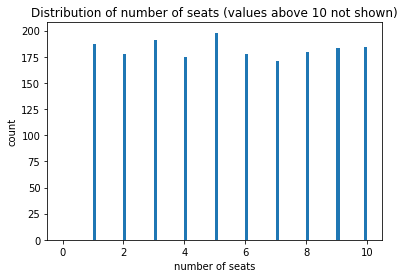

In [165]:
# plot distribution of seat number 
plt.hist(
    restaurants.number,
    bins=100,
    range=(0, 10)
);
plt.xlabel('number of seats')
plt.ylabel('count')
plt.title("Distribution of number of seats (values above 10 not shown)");

There are quite a few records with number-of-seats equal to one or two seats. Given this relatively large fraction, it is assumed that these values represnt actual number-of-seats. These could be places with a standing service.

## Conclusions
+ Integer data types were downcasted to 'int16'
+ Data does not contain any duplicated rows.
+ Data does not contain literal NaN values and does not seem to contain any logical missing values.

# Analysis

## Shop type

### Market share

In [166]:
type_counts = (
    restaurants['object_type']
    .value_counts()
    .rename_axis('type')
    .reset_index()
    .rename(columns={'object_type': 'count'})
)
type_counts

,type,count
0,Restaurant,7255
1,Fast Food,1066
2,Cafe,435
3,Pizza,320
4,Bar,292
5,Bakery,283


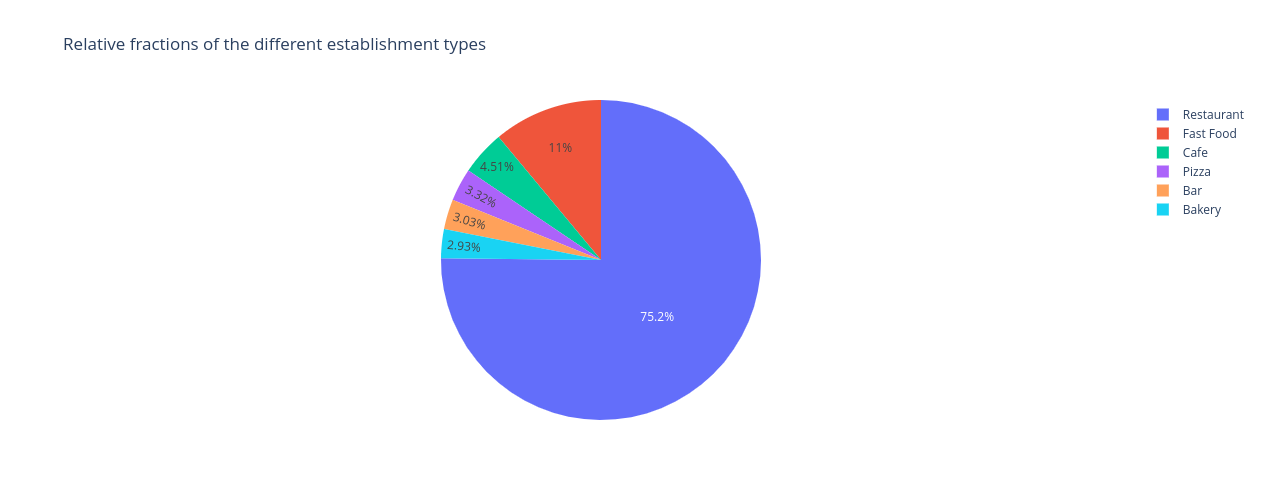

In [167]:
fig = px.pie(
    data_frame=type_counts,
    names='type',
    values='count',
    title='Relative fractions of the different establishment types',
    height=500
)
fig

+ Restaurants make up 75% of the market. 
+ Cafes make up only 4.5% of the market.

### Seats per shop  

In [168]:
seats_per_establishment_type = (
    restaurants.groupby(
        'object_type',
        as_index=False
    )
    ['number'].mean()
)

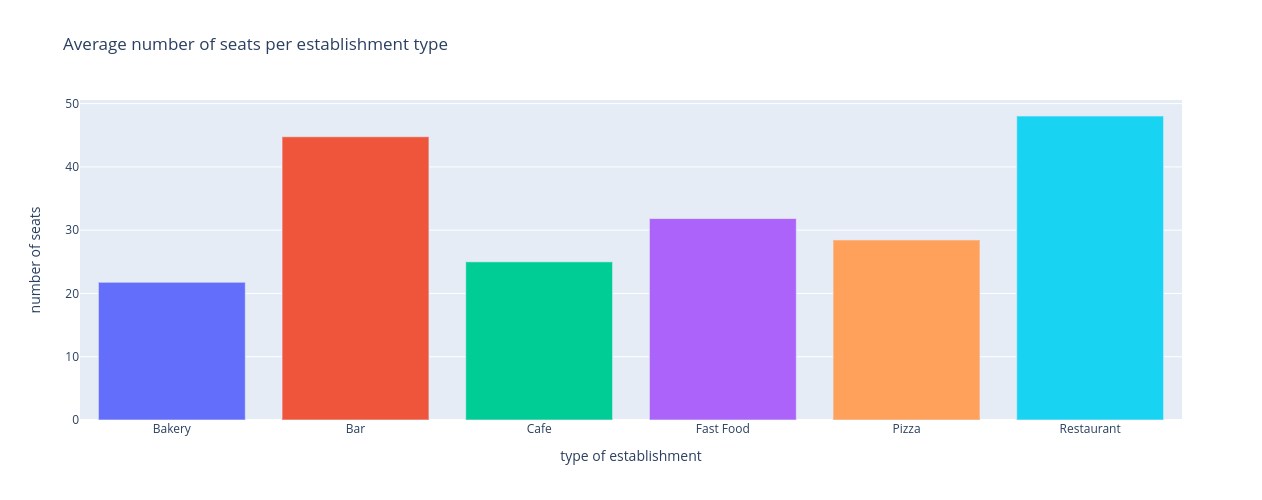

In [169]:
fig = px.bar(
    seats_per_establishment_type,
    x='object_type',
    y='number',
    color='object_type',
    title='Average number of seats per establishment type',
    width=700,
    height=500
)

fig.update_yaxes(
    title='number of seats'
)

fig.update_xaxes(
    title='type of establishment'
)

fig.update_traces(
    showlegend=False
)


+ Bars and restaurants typically have a large number of seats (more than 40) while all other establishment types usually have ~30 or less seats.

## Chains

### Chains Vs. non-chains

In [170]:
is_chain = (
    restaurants['chain']
    .value_counts()
    .rename_axis('is_chain')
    .reset_index()
    .rename(columns={'chain': 'count'})
)

is_chain['count'] = (
    is_chain['count'] 
    / is_chain['count'].sum() * 100
)


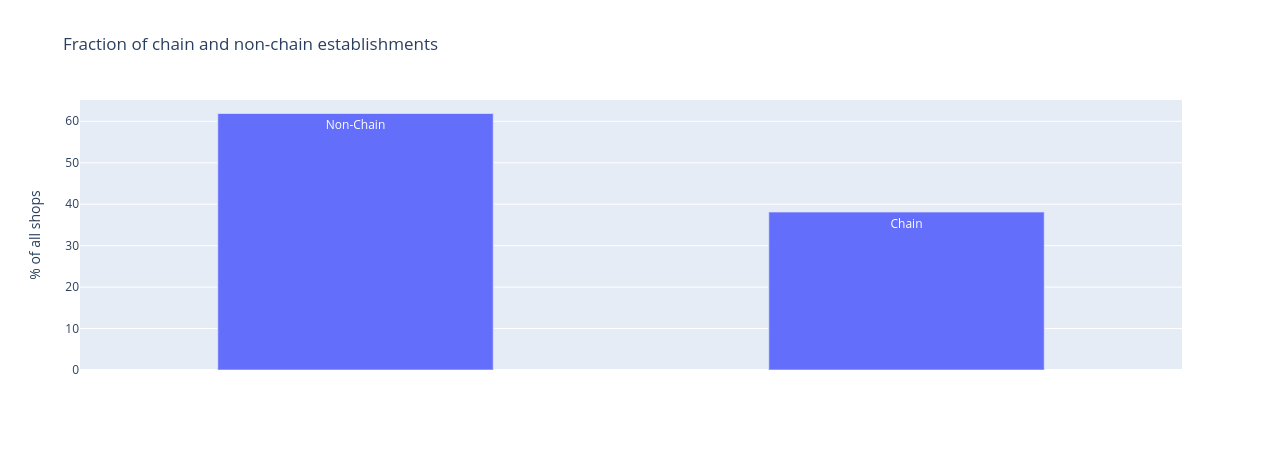

In [171]:
# plot number of chain vs. non-chain shops
fig = px.bar(
    is_chain,
    x=['non-chain', 'chain'],
    y='count',
    title='Fraction of chain and non-chain establishments',
    height=450,
    width=500,
    text=['Non-Chain', 'Chain'],
)
fig.update_traces(
    width=[0.5, 0.5],
)
fig.update_xaxes(
    title='',
    showticklabels=False

)
fig.update_yaxes(
    title='% of all shops'
)



In [172]:
print()
print(
    f"{is_chain.set_index('is_chain').loc[False, 'count']:.0f}% "
    "of the shops are non-chain establishments, "
    f"and {is_chain.set_index('is_chain').loc[True, 'count']:.0f}% "
    f"are chain ascociated"
)


62% of the shops are non-chain establishments, and 38% are chain ascociated


### Typical characteristics of chain associated establishments.
* Which type of establishment is typically a chain?
* What characterizes chains: many establishments with a small number of
  seats or a few establishments with a lot of seats?

#### Shop type

In [173]:
is_chain_by_type = (
    (
        restaurants
        .groupby('object_type')
        ['chain'].mean()
        * 100
    )
    .reset_index()
    .rename(columns={'chain': 'is_chain_percent'})
)


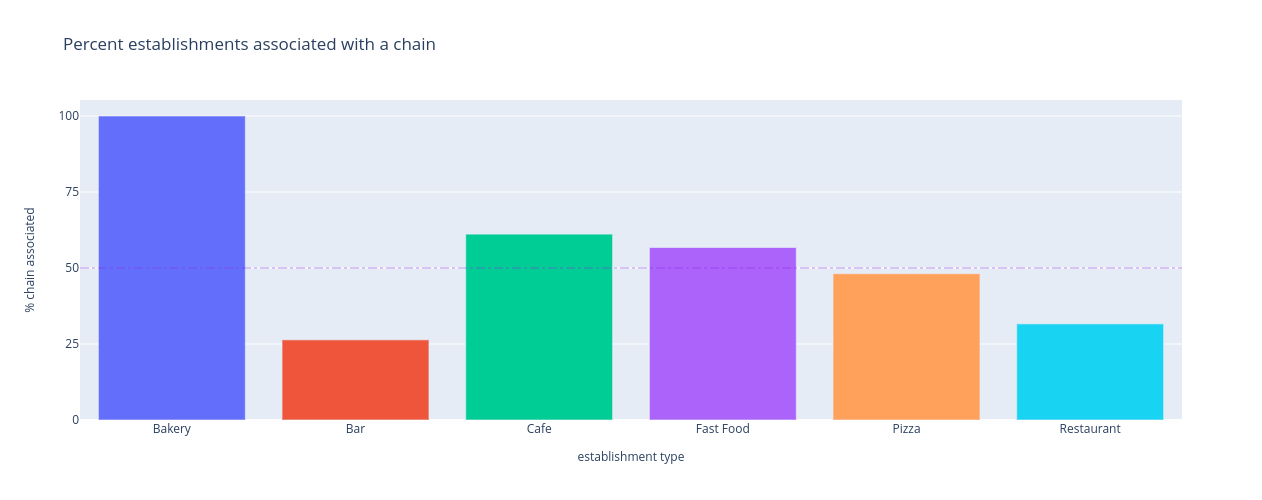

In [174]:
fig = go.Figure()

fig = px.bar(
        is_chain_by_type,
        x='object_type',
        y='is_chain_percent',
        color='object_type',
        title='Percent establishments associated with a chain'
    )

fig.update_layout(
    dict(width=700, height=500)
)
fig.update_yaxes(
    title="<span style='font-size:12px'>% chain associated</span>",
    dtick=25
)

fig.update_xaxes(
    title="<span style='font-size:12px'>establishment type</span>",
)

fig.add_hline(
    y=50,
    line=dict(
        color='blueviolet',
        width=0.5,
        dash='dashdot'
    )
)

fig.update_traces(
    showlegend=False
)



+ 100% of the bakeries are chain establishements.
+ Roughly half of all Cafes, Fast food and Pizza establishments, are chain associated.
+ Bars and Restaurants are typically non-chain establishments.

In [175]:
# slice out non-chain establishments
chains = restaurants[restaurants['chain'] == True]

<!-- ##### Distribution of seat-per-shop in chain associated establishments -->

In [176]:
chains['chain_name'] = ''

<ipython-input-176-8ffb47f3b6c5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [177]:
chains['chain_name'] = (
    chains['object_name']
    .apply(
        lambda x:
        str(x).split('#')[0] 
        if '#' in x
        else x
    )
)

<ipython-input-177-3dd409f7f6a1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [178]:
# group by chain name --> count establishments and compute mean number of seats
counts = (
    chains.pivot_table(
        index='chain_name',
        values=[
            'id',
            'number'
        ],
        aggfunc={
            'id': 'count',
            'number': 'mean'
        }
    )
    .sort_values(
        'id',
        ascending=False
    )
    .reset_index()
    .rename(
        columns={
            'id': 'chain_size',
            'number': 'average_seats'
        }
    )
)

In [179]:
# decile bounderies for seat count
percentiles = np.percentile(counts['average_seats'], np.arange(10, 100,10))

# assign records into seat count classes
counts['seat_count_class'] = (
    pd.cut(
        counts['average_seats'],
        percentiles,
        labels=np.arange(len(percentiles) - 1)
    )
)


+ The vast majority of chains are small scale chains with less than 10 shops per chain.
+ Out of these small scale chains, the majority are 1 shop chains.
+ Only a few large scale chain exist in the records.

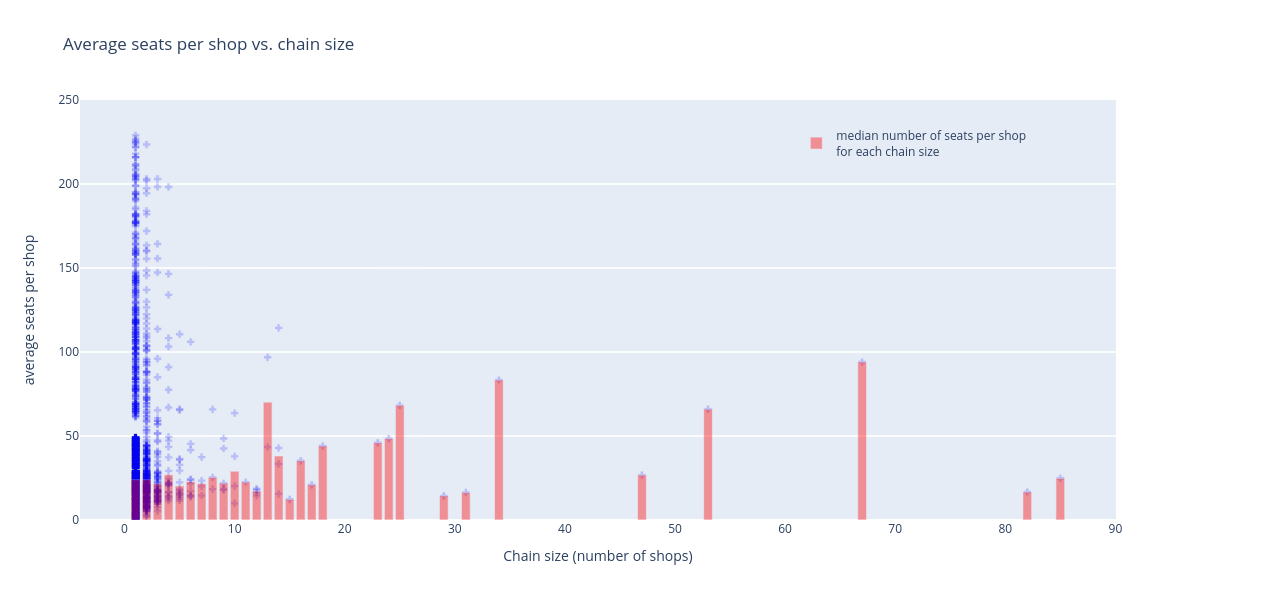

In [180]:
# intialize figure
fig = make_subplots(
    specs=[[{"secondary_y": True}]]
)

# update figure layout
fig.update_layout(
    dict(
         height=600,
         width=1000,
    )
)

# add the main plot trace seats-per-shop Vs. shops-per-chain
fig.add_trace(
    go.Scatter(
        x=counts['chain_size'],
        y=counts['average_seats'],
        mode='markers',
        marker_color='blue',
        marker_symbol='cross',
        showlegend=False
    ),
    secondary_y=False
)


# visual setup for markers
## hex color to rgb convertor
    ## split the hex color into three, two digit hex numbers, converting each one into a decimal 
hex_to_rgb = (
    lambda color:
    tuple(
        int(color.lstrip('#')[i:i+2], 16) 
        for i in (0, 2, 4)
    ) 
)

## line color
line_color_named = 'midnightblue' # CSS color
line_color_rgb = colors.to_rgb(line_color_named)

## marker opacity
opacity = 0.2
fig.update_traces(
    marker=dict(
        line_width=0.5,
        line_color=f"rgba{line_color_rgb + (opacity,)}",
        opacity=opacity,
    ),
)

# add bars for median seats per shop for each chain size.
## compute medians
median_seats_per_chain_size = (
    counts
    .groupby('chain_size')
    ['average_seats'].median()
)
median_seats_per_chain_size = (
    pd.DataFrame(
        median_seats_per_chain_size
    )
    .reset_index()
)

# intialize trace
legend_label = (
    'median number of seats per shop<br>'
    'for each chain size'
)
trace = (
    go.Bar(
        px.bar(
            median_seats_per_chain_size,
            x='chain_size',
            y='average_seats',
        )
        .data[0],
        opacity=0.4,
        name=legend_label,
        showlegend=True
    )
)
# bar style
trace['marker'] = dict(
    color='red',
)

# setup for secondery axis, remove ticksand title, and scale

# add bar trace
fig.add_trace(
    trace,
    secondary_y=True
)
# fig.layout.yaxis2 = dict(title='foo')
fig.update_yaxes(showticklabels=False, secondary_y=True, overwrite=True)
fig.update_yaxes(range=(0, 250))

# legend 


# x label
fig.update_xaxes(
    title='Chain size (number of shops)'
)

# y label
fig.update_yaxes(
    title='average seats per shop',
    secondary_y=False
)

# plot title
# medain_marker_symbol = fig.data[1]['marker_symbol']
# subtitle_size = 15

title = (
    f"Average seats per shop vs. "
    f"chain size<br>"
)
fig.update_layout(
    title=title,
    legend=dict(
        x=0.65,
        y=0.95,
        bgcolor='rgba(0,0,0,0)'
    )
)

# # dont show legend
# fig.update_traces(
#     showlegend=False
# )

#### Conclusions

+ Small scale chains are widely distributed in terms of the average number of seats per shop, with quite a few chains having a large average number of seats (considering that the large majority of small scale chains only have one shop, these averages are more often than not, actualy the exact number of seats per shop).
+ Although many small scale chains have a relatively high average seats-per-shop, The median for these chains is actually rather small, at 24 seats-per-shop. 
+ Larger scale chains are evidently far fewer than small scale chain. 


## Streets
* Put the data on street names from the address column in a separate column.
* Plot a graph of the top ten streets by number of restaurants.
* Find the number of streets that only have one restaurant.
* For streets with a lot of restaurants, look at the distribution of the number
  of seats. What trends can you see?

### Get street names

In [181]:
# get addresses as a list of strings
addresses = [str(address) for address in restaurants.address.values]

In [182]:
# compile a regex object
p = re.compile('^\d*\s*([NWES]*\s*\w+\s*\w*)\s*.*')

In [183]:
# for each address match the street name and append to the 'streets' list
streets = []
for address in addresses:
    m = p.match(address)
    try:
        streets.append(m.group(1))
    except:
        print(f'no match for address: {address}')

In [184]:
# create a 'street' column and assign the 'streets' list into it
restaurants['street'] = streets

### Shops per street (street occupancy)

In [185]:
# number of resturants per street
shops_per_street = (
    restaurants
    .groupby(
        'street',
        as_index=False
    )
    ['id'].count()
    .sort_values(
        'id',
        ascending=False
    )
    .reset_index(drop=True)
    .rename(
        columns={'id': 'n_places'}
    )
)


In [186]:
shops_per_street.head()

,street,n_places
0,WILSHIRE BLVD,381
1,W SUNSET BLVD,360
2,W PICO BLVD,340
3,S WESTERN AVE,271
4,SANTA MONICA,262


#### Top 10 streets by shop count

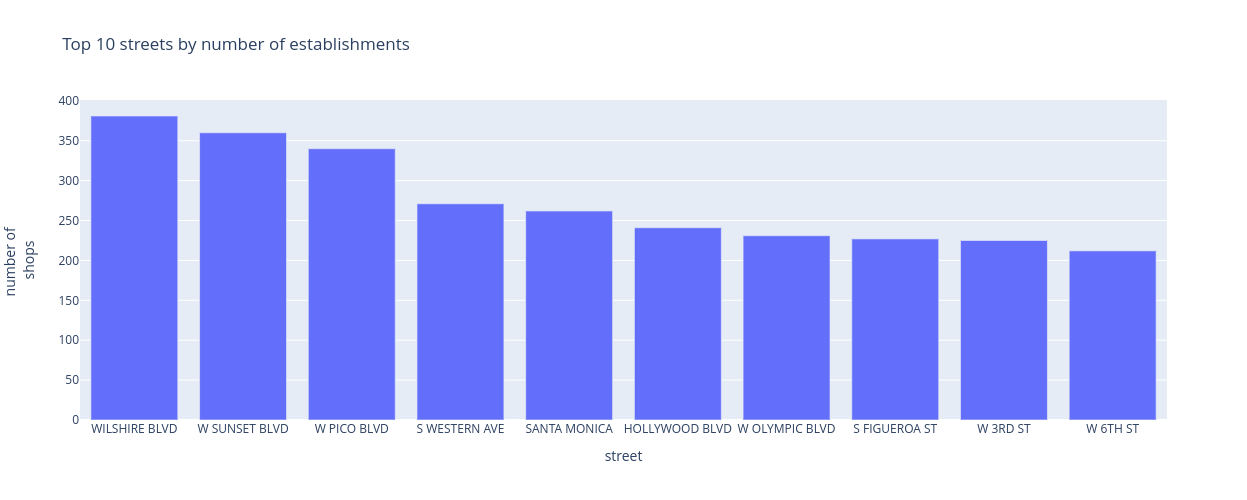

In [187]:
# top 10 streets by restaurant count
top_10_streets = (
    shops_per_street[:10]
)

fig = px.bar(
    top_10_streets,
    x='street',
    y='n_places',
    title='Top 10 streets by number of establishments',
    height=500,
    width=700
)

fig.update_yaxes(
    title='number of <br>shops'
)

In [188]:
# get a slice of streets with only 1 restaurant
streets_1_establishment = (
    shops_per_street[
        shops_per_street['n_places'] == 1
    ]
)

In [189]:
print()
print(
    f"Number of streets with only one shop:"
    f" {len(streets_1_establishment)} "
    f"({len(streets_1_establishment)/len(shops_per_street['street']):.0%})"
)


Number of streets with only one shop: 318 (43%)


#### General distribution of shops per street


Total number of streets: 741


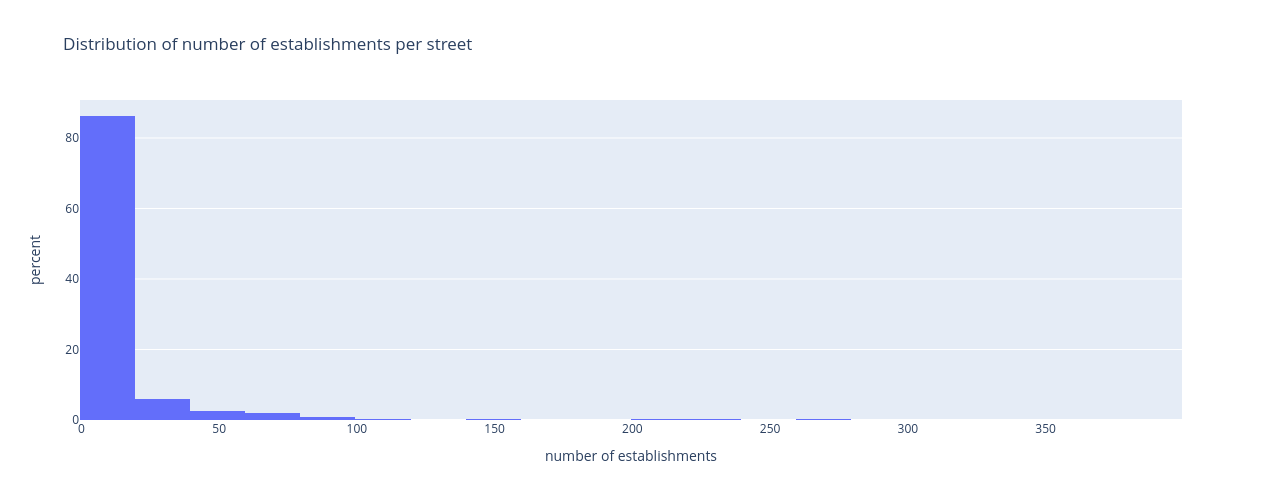

In [190]:
print()
print(
    f"Total number of streets: {shops_per_street['street'].size}"
)

fig = px.histogram(
    shops_per_street,
    x='n_places',
    title='Distribution of number of establishments per street',
    nbins=20,
    height=500,
    width=700,
    histnorm='percent'
)
fig.update_xaxes(
    title='number of establishments'
)


In [191]:
shops_per_street_freq = (
    shops_per_street
    .stb.freq(cols=['n_places'])
    .sort_values('n_places')
)
shops_per_street_freq[shops_per_street_freq['cumulative_percent'] < 90]

,n_places,count,percent,cumulative_count,cumulative_percent
0,1,318,42.914980,318,42.914980
1,2,107,14.439946,425,57.354926
2,3,40,5.398111,465,62.753036
4,4,26,3.508772,518,69.905533
3,5,27,3.643725,492,66.396761
5,6,20,2.699055,538,72.604588
6,7,15,2.024291,553,74.628880
7,8,13,1.754386,566,76.383266
8,9,12,1.619433,578,78.002699
10,10,10,1.349528,599,80.836707


#### Conclusions

+ Top quartile are streets with 8 or more establishments.
+ More than 85% of the streets have 16 or less shops per street.
+ Only 10% of the streets have more than a hundred shops.

### Incorporate shops per street into original DataFrame

In [192]:
# function to get shop count per street from the shops_per_street DF
def get_shops_per_street(street):
    shop_count_series = (
        shops_per_street
        .loc[
            shops_per_street['street'] == street,
            'n_places'
        ]
    )
    shop_count = (
        shop_count_series.values[0]
    )
    
    return shop_count

In [193]:
# apply the get_shops_per_street function to the 'street' column in orginal data set 
restaurants['shops_per_street'] = (
    restaurants['street']
    .apply(get_shops_per_street)
)

In [194]:
restaurants.head()

,id,object_name,address,chain,object_type,number,street,shops_per_street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK,3
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY,145
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD,241
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD,360
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK,14


### Seats per shop by street occupancy (shops per street)

In [195]:
# set the threshold for busy vs. non-busy streets
percentile = 95 
threshold = (
    np.percentile(
        restaurants['shops_per_street'],
        percentile
    )
)

print(
    f"Upper threshold for low occupancy streets ({percentile}th percentile): {threshold:.0f} shops"
    "\n"
)

Upper threshold for low occupancy streets (95th percentile): 360 shops



In [196]:
# slice data into low and high occupancy streets
low_occupancy_streets = restaurants[restaurants['shops_per_street'] < threshold]
high_occupancy_streets = restaurants[restaurants['shops_per_street'] >= threshold]

print()
print(
    f"Number of shops in low occupancy streets: "
    f"{len(low_occupancy_streets['id'])}\n"
    f"Number of shops in high occupancy streets: "
    f"{len(high_occupancy_streets['id'])}"
)
print()


Number of shops in low occupancy streets: 8910
Number of shops in high occupancy streets: 741



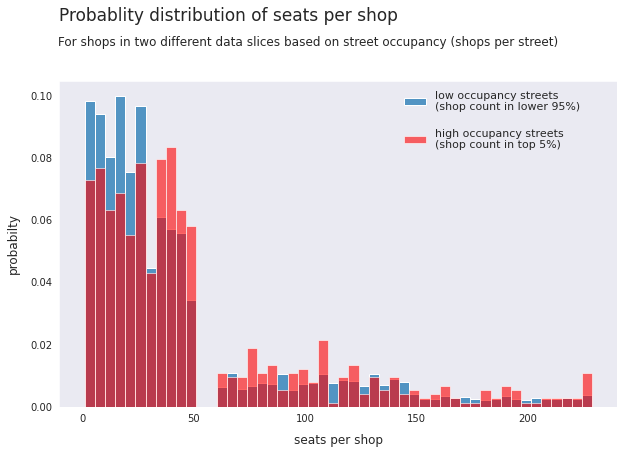

In [197]:
# plot histograms of seats per shop in busy vs. non-busy streets

# set style for seaborn
sns.set_style('dark')


# initialize figure and axes
fig = plt.figure(
    figsize=(10, 6)
)
ax = plt.gca()

# low shop number streets
sns.histplot(
    data=low_occupancy_streets,
    x='number',
    ax=ax,
    bins=50,
    stat='probability'
)

# high shop number streets
sns.histplot(
    data=high_occupancy_streets,
    x='number',
    color='red',
    ax=ax,
    bins=50,
    stat='probability'

)


# set alpha for top layer of bars
alpha = 0.6
red_bars = ax.containers[1]
[bar.set_alpha(alpha) for bar in red_bars]

# x label
plt.xlabel(
    "seats per shop",
    size=12,
    labelpad=10
)

# y label
plt.ylabel(
    "probabilty",
    size=12,
    labelpad=10
)

# title
subtitle = (
    "For shops in two different data slices based "
    "on street occupancy (shops per street)"
)
title = (
    "Probablity distribution of seats per shop\n"
)
fig.suptitle(
    title,
    size=17,
#     ha='right',
    x=0.36,
    y=1.05
)
plt.gca().set_title(
    subtitle,
    pad=35,
    x=0.445
)
# # remove grid
# plt.grid(b=False)

# legend
# legend labels
label_all_shops = (
    f"low occupancy streets\n"
    f"(shop count in lower {percentile:.0f}%)"
)
label_shops_on_busy_streets = (
    f"high occupancy streets\n"
    f"(shop count in top {100 - percentile:.0f}%)"
)
plt.legend(
    plt.gca().containers,
    [
        label_all_shops,
        label_shops_on_busy_streets
    ],
    fontsize=11,
    loc='upper left',
    bbox_to_anchor=(0.6,1),
    labelspacing=1.5,
    frameon=False
    

);


plt.gcf().savefig('seats-per-shop.png', bbox_inches='tight')

+ Distribution of seats per shop in high occupancy streets seems slightly shifted towards higher seats-per-shop compared with low occupancy streets.

#### Test significance of differences between high and low occupancy streets

H<sub>0</sub>: The mean rank of seats per shop in high occupancy streets is less or equal to the distribution of seat per shop in low occupancy streets.\
H<sub>1</sub>: The mean rank of seats per shop in high occupancy streets is greater than the mean rank of seats per shop in low occupancy streets.


In [198]:
# set significance level 
alpha=0.05

# perform a one-tailed Mann-Whitney U test to test the hypothesis that
#  the mean rank of seats-per-shop in high occupancy streets
#  is greater than that of low-occupancy streets.
results = stats.mannwhitneyu(
    low_occupancy_streets['number'],
    high_occupancy_streets['number'],
    alternative='less'
)

print()
print()
print('p-value: ',  '{:.2E}'.format(results.pvalue))

if (results.pvalue < alpha):
    print(
        "Null hypothesis rejected: "
        "the difference is statistically significant"
    )
else:
    print(
        "Failed to reject the null hypothesis: "
        "we can't make conclusions about the difference"
    ) 
print()



p-value:  1.41E-09
Null hypothesis rejected: the difference is statistically significant



#### Conclusion
+ Shops in streets with high occupancy are more likely to have a higher number of seats.

### Shop type by street occupancy

In [199]:
# define boundries to divide shops per street into categories
deciles = np.percentile(restaurants['shops_per_street'], np.arange(0, 110, 10))
deciles = np.append(0, deciles)


In [200]:
# group shops by shop-per-street categories and count the type values for each category 
shop_type_by_street_shop_count = (
    restaurants.groupby(
        pd.cut(
            restaurants['shops_per_street'],
            deciles,
            labels=np.arange(len(deciles) - 1)
        )
    )
    ['object_type'].value_counts()
    .rename('n_shops')
#     .rename('foo')
    .reset_index()
    .rename(
        columns={'shops_per_street': 'street_occupancy'}
    )
)

In [201]:
shop_type_by_street_shop_count = (
    shop_type_by_street_shop_count
    .groupby(
        [
            'street_occupancy',
            'object_type'
        ]
    ).mean()
)

In [202]:

dataframes_shop_count_per_type = {}
for interval in shop_type_by_street_shop_count.index.levels[0]:
    dataframe = pd.DataFrame(
        shop_type_by_street_shop_count.loc[interval]
    ).reset_index()
    dataframes_shop_count_per_type[interval] = dataframe


shops_per_type_by_street_occupancy = pd.concat(
    [
        value['n_shops']
        for value
        in dataframes_shop_count_per_type.values()
    ],
    keys=[
        str(key)
        for key
        in dataframes_shop_count_per_type.keys()
    ],
    axis=1
)
shops_per_type_by_street_occupancy.index = (
    shop_type_by_street_shop_count.loc[0].index
)

shops_per_type_by_street_occupancy = (
    shops_per_type_by_street_occupancy
    .rename_axis(columns='street_occupancy')
)

In [203]:
shops_per_type_by_street_occupancy

street_occupancy,0,1,2,3,4,5,6,7,8,9,10
object_type,,,,,,,,,,,
Bakery,11.0,23.0,18.0,25.0,25.0,27.0,41.0,37.0,24.0,35.0,17.0
Bar,9.0,22.0,42.0,27.0,22.0,33.0,28.0,31.0,23.0,32.0,23.0
Cafe,9.0,39.0,36.0,49.0,44.0,39.0,40.0,56.0,33.0,43.0,47.0
Fast Food,17.0,46.0,147.0,111.0,146.0,143.0,150.0,96.0,68.0,86.0,56.0
Pizza,5.0,26.0,33.0,31.0,36.0,20.0,41.0,28.0,23.0,51.0,26.0
Restaurant,267.0,537.0,708.0,683.0,704.0,724.0,719.0,750.0,724.0,867.0,572.0


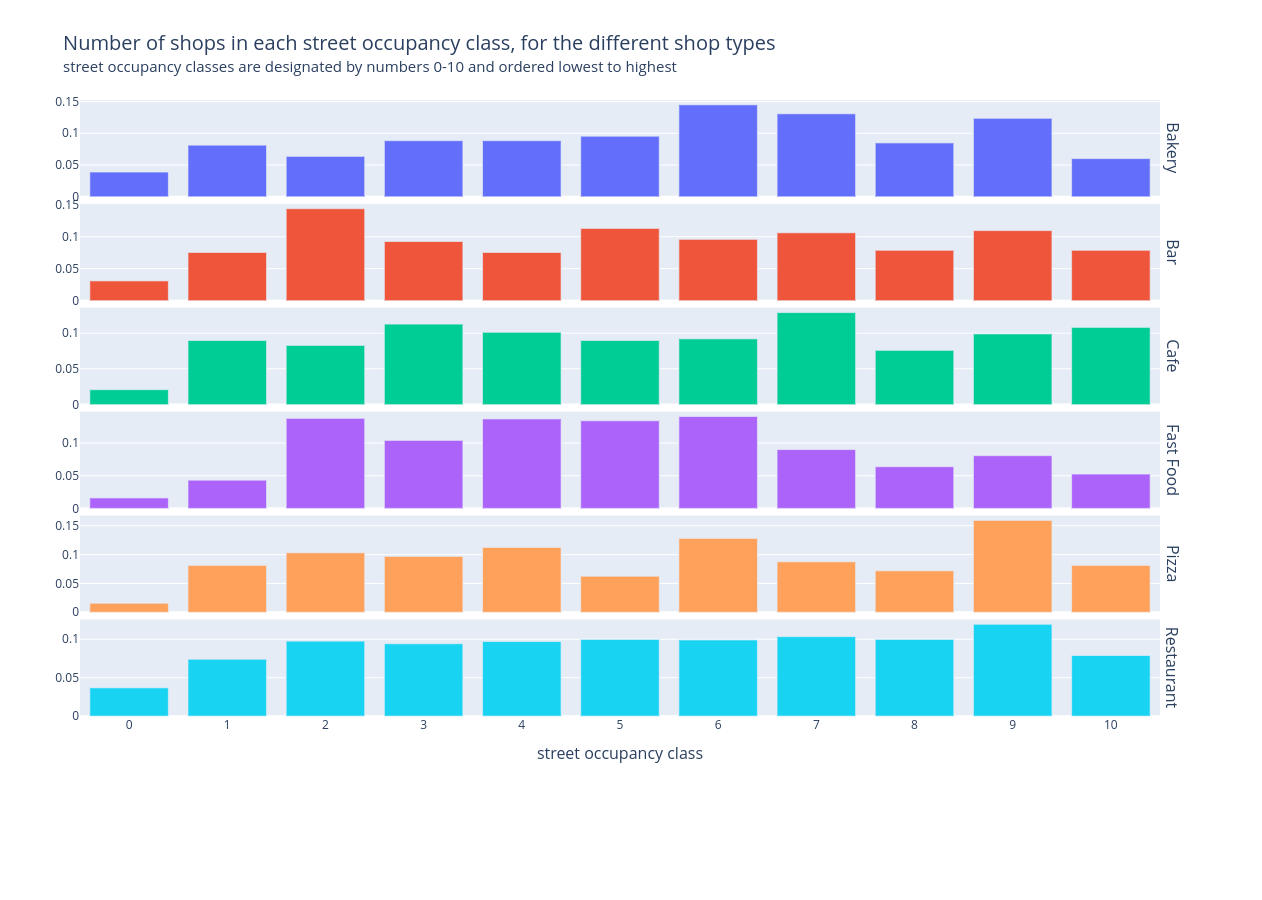

In [204]:
# initialize figure
# n rows
len_columns = len(
    shops_per_type_by_street_occupancy.index
)
nrows = int(
    (len_columns + 1)
)

# figure
fig = (
    plotly.subplots.make_subplots(
        rows=nrows,
        cols=1,
        shared_yaxes=True,
        shared_xaxes=True,
        vertical_spacing=0.01,
#         row_heights=[100]*nrows,
        row_titles=[i for i in shops_per_type_by_street_occupancy.index]
    )
)

# figure layout
fig.update_layout(
    title=(
        "<span style='font-size:20'>"
        "Number of shops in each street occupancy class, "
        "for the different shop types<br>"
        "</span>"
        "<span style='font-size: 15'>"
        "street occupancy classes are designated "
        "by numbers 0-10 and ordered lowest to highest"
        "</span>"
    ),
    height=len_columns*150,
    width=700
)

# bar plots for each shop type
for i, shop_type in\
        enumerate(shops_per_type_by_street_occupancy.index):
    data_series = (
        shops_per_type_by_street_occupancy.loc[shop_type]
        / shops_per_type_by_street_occupancy.loc[shop_type].sum()
    )
    fig.add_trace(
        go.Bar(
            x=data_series.index,
            y=data_series.values,
            width=0.8,
        ),
        row=i+1,
        col=1,
    )
   

# x axis setup (use last subplot to access labels)
# x ticks
fig['layout']['xaxis6']['showticklabels'] = True
# x label
fig['layout']['xaxis6']['title'] = {
    'text': 'street occupancy class',
    'font_size': 16
}

# y label
fig.add_annotation(
    {
        'font' : {'size': 16},
        'showarrow': False,
        'text': 'relative shop type count',
        'textangle': 270,
        'x': -0.12,
        'xanchor': 'left',
        'xref': 'paper',
        'y': 0.5,
        'yanchor': 'middle',
        'yref': 'paper'
    }
)
fig.update_traces(
    showlegend=False
)

#### Conclusions
+ Bakery type shops are slightly more common in high occupancy streets.
+ Fast food type shops are slightly more common in middle range occupancy streets.
+ Other shop types do not seem to be ascociated with any particular street coccupancy class range.

<a id="org979c180"></a>

# Project conclusions


<a id="org26cc6eb"></a>

## Project description

In preparation for opening an inovative, robot-run cafe in Los Angeles, we we're asked to carry out a market research and come up with conclusions regarding the long-term economic feasibility of such an enterprise.


<a id="orga9a0c2e"></a>

## Per-processing

The supplied data was clean and ready for analysis. Several of the data columns were optimized in terms of data types.


<a id="orgc032aa1"></a>

## Analysis

Market data was examined from the following aspects:

-   Market share and characteristics of different shop types (cafe\restaurant\bar etc.)
-   Fraction of chain\non-chain establishments and the typical characteristics of chains.
-   Distribution and characteristics of shops by street.
-   Number of seats per shop.


<a id="org05ff5b1"></a>

### Shop type

-   The large majority of the market is comprised of restaurant type shops.
-   Cafes make a small yet significant fraction of the market (<5%).
-   Fast food shops make up ~10% of the market share.
-   *Cafe*, *fast food* and *pizza* type shops are all distributed roughly evenly between chain and non-chain establishments. All bakeries are chain associated. Restaurants and bars are mostly non-chain establishments.


<a id="orge816681"></a>

### Chains

-   Roughly 40% of all shops are chain associated and the other 60% are non-chain shops.
-   Almost all chains are small scale chains (number of shops <= 12),


<a id="org6c9335f"></a>

### Streets

-   Out of 741 streets that are in the records, more than 85% have 16 or less shops per street, and in 43% of the streets there's only one shop.
-   Only 10% of the streets have more than 100 shops per street.
-   No relation was found between shops per street and the number of seats per shop.
-   Some slight variations were observed between high and low occupancy streets, in terms of the distribution of shop types. Fast food type shops are slightly more likely to be found in middle range streets, while bakeries show a small tendency towards streets with high shop occupancy. Distribution of other shop types did not show any clear pattern in this regard.


<a id="org15ce12f"></a>

## Final conclusions 

-   Restaurant type shops make up the largest share of the market by far, suggesting this business niche might be somewhat saturated.
-   Cafe type shops make a rather small yet significant share of the LA food service market. This suggests a high ratio of demand-to-supply, making this type of food business a potentially profitable channel of investment.
-   Similar conditions may exist for Fast food shops, as the share of fast food businesses is considerable, yet still far smaller than the restaurant share.
-   Non-chains shops make up the larger share of the market compared with chain associated shops, while within chain associated establishments, small scale chains are by far the most common ones.
-   Fast food type  shops are typically more common in middle range occupancy streets compared to other street  occupancy classes, and bakeries are more likely to be found in high occupancy streets.

## Recommendations
+ Cafes and Fast food enterprises seem to be the most promising investment channels, with a favorable supply-to-demand ratio.
+ A reasonable shop size (in terms of seats per shop) for chain based shops, would be 25 seats.
+ Given a choice of a fast food business, small scale chain based shops may prove more profitable. Also, for this type of shop, middle range occupancy streets should be preferred. 

+ In light of the above, we recommend the company should invest in a small scale chain of cafes or fast food shops, with an average number of seats per shop of 25. We also recommend, as a general rule, that these shops woulf be situated in middle range occupancy streets.
